<a href="https://colab.research.google.com/github/acastellanos-ie/ML2-MBD-EN-OCT-2021-S-1/blob/main/ml_pipeline_review/ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Github

For this course, we are going to use Github as code repository. Github is just another provider for version control using Git.

Version control is a key component of any software development project, machine learning included. It is not the scope of this project to provide a deep understanding of Github or the lifecycle of an ML project; nevertheless, I would like to use the tool so you are familiar with it. You will very likely use Github in your future projects, so I strongly advise you to give it a try.

Very briefly, Github is a platform where you can upload and store your code and share it with your collaborators. It facilitates code sharing by providing the tools that ensure that all the collaborators work with the same code version, thus avoiding conflicts among different versions.

To that end, you create a repository (i.e., you should have a different repo for each project that you are working on) where you can download (pull command) the latest version of the code and upload (push command) your updates to it.

These are just the basics for Git. For more details in Git and Github, I recommend you to check the [Github Learning Lab](https://lab.github.com/) where you can find several courses and learning paths to master Github and its use. You will not require most of this knowledge for the course since we will only use some of the basic Github features. In any case, if you want more details on the different features available, the [First Day](https://lab.github.com/githubtraining/first-day-on-github) and [First Week](https://lab.github.com/githubtraining/first-week-on-github) learning paths will be more than enough.

## Course Repository

I have already created the repository for the course:

https://github.com/acastellanos-ie/ML2-MBD-EN-OCT-2021-S-1

In this repository, you can find the different practices and the related files. As you can see, you do not yet have the solutions to the exercises. I will upload them after the practice sessions.

In the repository, you can also find the details on how to configure the repository in your local computer if you want to execute the files locally. If you prefer to avoid the burden of configuring and running the code on your laptop, we have great (and almost free) alternatives nowadays to do it on the cloud. In particular, for this course, I have prepared the notebooks so you can run them online on Google Colab.

# Google Colab


Colab is an online development environment provided by Google. Colab allows the creation and running of Python Notebooks in the cloud, minimizing the configuration: 

https://research.google.com/colaboratory/

To facilitate the execution of the notebooks in Colab, I have included at the beginning of each one of them a link for it:

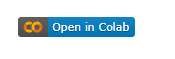

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [ ]:
repository_name = "ML2-MBD-EN-OCT-2021-S-1"
repository_url = 'https://github.com/acastellanos-ie/' + repository_name

In [ ]:
! git clone $repository_url

Cloning into 'ML2-MBD-EN-OCT-2021-S-1'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 98 (delta 33), reused 38 (delta 3), pack-reused 0
Unpacking objects: 100% (98/98), done.


Install the requirements

In [ ]:
! pip install -Uqqr $repository_name/requirements.txt

     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 11.2 MB 11.4 MB/s 
     |████████████████████████████████| 261 kB 47.3 MB/s 
     |████████████████████████████████| 62 kB 606 kB/s 
     |████████████████████████████████| 25.3 MB 20.7 MB/s 
     |████████████████████████████████| 173.5 MB 10 kB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 69 kB 6.4 MB/s 
     |████████████████████████████████| 631 kB 45.5 MB/s 
     |████████████████████████████████| 884 kB 52.6 MB/s 
     |████████████████████████████████| 3.1 MB 52.4 MB/s 
     |████████████████████████████████| 303 kB 46.8 MB/s 
     |████████████████████████████████| 596 kB 52.7 MB/s 
     |████████████████████████████████| 248 kB 49.5 MB/s 
     |████████████████████████████████| 102 kB 49.5 MB/s 
     |████████████████████████████████| 245 kB 47.3 MB/s 
     |████████████████████████████████| 244 kB 49.8 MB/s 
     |██████████████

Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

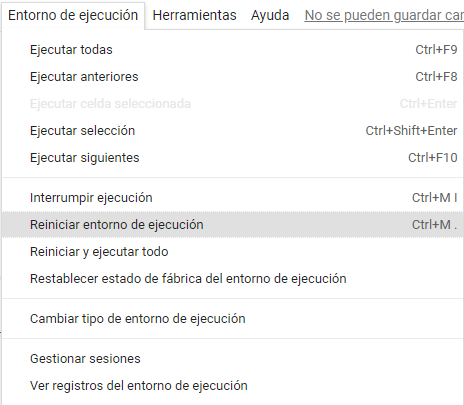

In [ ]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Figures
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import itertools
from collections import defaultdict
from operator import itemgetter

# Introduction



## What is my goal?
The main goal is to **predict which of the 2 teams (CT and Terrorist) is going to win a GS:GO match** (`round_winner` variable). It's, therefore, a binary classification problem.

To that end, we must cover the following steps:

- Clean the dataset to allow its further processing. Among other things, we must transform the dataset by removing errors, imputing missing values (if present in the dataset), and leaving only informative features. At this point, it's important to run a basic model (baseline) over the dataset to have a starting point for further processing.
- Use the feature engineering techniques to construct new features and select the best subset of them to check then if you have improved your model w.r.t. your baseline model.
- Properly apply the evaluation methods and ideas to understand the proposed models' real performance, ensuring that they will generalize to unseen data (test set).

These steps are iterative. You must show with data whether your decisions are working towards a better model or not, to finally recommend the best features and the best model.

# Useful Functions

In order to facilitate the evaluation of the impact of the different steps, I am going to place the code for creating a baseline model in a function. Now I can call it again and again without having to re-write everything. The only thing that changes from one case to another is the dataset that is used for training or the selected model.


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
  
def train_model(X,y, model, show_figures=True, show_feat_importance=True): 
    cv_results = cross_validate(model, X, y, cv=5, return_estimator=True, verbose=True, n_jobs=-1)
    print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_score'].mean(), cv_results['test_score'].std() * 2))
    get_coeff_importance(cv_results, X,y, n_features=25)
    return cv_results, cv_results['test_score'].mean()

def get_coeff_importance(cv_results, X, y, n_features):
    if hasattr(cv_results['estimator'][0], "coef_"): 
        # If the model is based on LogReg it takes the coeficients
        feature_importance = np.array([model.coef_[0] for model in cv_results['estimator']]).mean(axis=0)
    elif hasattr(cv_results['estimator'][0], "feature_importances_"):
        # If the model does not have coefficients it takes the feature importance
        feature_importance = np.array([model.feature_importances_ for model in cv_results['estimator']]).mean(axis=0)
    else:
        # It the models does not have coefficients or feature importance (e.g., KNN), it performs permutation importance
        # feature_importance = np.array([permutation_importance(model, X, y, scoring='accuracy', n_jobs=-1).importances_mean for model in cv_results['estimator']]).mean(axis=0)
        return
        
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[:n_features]
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure(figsize=(10,10))
    featfig.suptitle(str(n_features) + " Most important features")
    featax = featfig.add_subplot(1, 1, 1)
    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_xticks([])
    featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=15)
    featax.set_xlabel('Relative Feature Importance', fontsize=15)
    plt.show()

# Data Reading and Visualization


The dataset is offered in two separated fields, one for the training and another one for the test set. 

In [ ]:
training_set = pd.read_csv("./dataset/training_set.csv", delimiter=",", decimal=".")
test_set = pd.read_csv("./dataset/test_set.csv", delimiter=",", decimal=".")

I will focus on the training dataset to do the entire experimentation. 

Something to avoid at all costs is to make decisions based on the information on the test dataset (i.e., data leakage). My piece of advice: take the test dataset, store it in a flash drive and store it in a drawer 'till you finalize the ML process.

However, you need to be careful to apply the same transformations that you applied for the training dataset to the test dataset for the final predictions.

pip install -U pandas-profiling
Let's now visualize the dataset to see where to begin. To that end, I recommend you to use Pandas Profile Report to have a "quick" (i.e., it will be actually quite slow since we have many features) view of the dataset.

In [ ]:
profile = ProfileReport(training_set, title="Pandas Profiling Report", minimal=False)
profile

I don't see any problems with the encoding. The profiling tool identifies some features that should be categorical but are codified as numericals. Nevertheless, at a closer look we can see that they are related to the number of specific weapons that each team has, which is clearly a numerical feature.

Additionally, we see some feature with constant values (i.e., meaning that they do not provide any predictive value). We could remove them in the data cleaning process, but since sklearn is able to deal with them (i.e., basically it will remove them from the training process), there is no need to spend time on it

We have to take care of everything in the data cleaning process

# Data Sampling


The dataset is rather large and could be annoying to experiment with (models take a while to train, the notebook could crash due to lack of RAM, the computer freezes, etc...).

A common practice in any data science experimentation is to only work with a subsample of the dataset. Instead of using the entire dataset, you can subset a percentage (e.g., 10%) to carry out the experimentation.
Even this small subsample is usually representative of the entire dataset. In other words, whatever result you obtain with it can be extrapolated to the full dataset (i.e., usually with the whole dataset, your results are better in general, but at this point, we do not care about the absolute performance, but the relative performance when comparing among models).

Therefore, I will subsample randomly 10.000 data points from the original dataset to experiment. The only important thing to remember is to finally use the entire dataset when you create the final model (i.e., the one used for the test predictions or promoted to production).


In [ ]:
training = training_set.sample(10000)

# Data Cleaning and Preparation

## Null Values

Null values are related to values that are missing in the data. 

None of the features in the dataset present any NULL values so we don't have to take care of this aspect. This is extremely uncommon. Most of the data you will work with will be messy; expect many errors, NULL values and some other problems that you should consider in you analysis. The only reason you do not have them in this dataset is because it has been properly cleaned for research purposes.

In the following practice we will cover NULL values, the different considerations to take into account, as well as how to impute them.


## Feature Encoding

Since we have numerical and categorical values, we have to dummify the categorical features in the dataset so we can train our ML models. Most ML algorithms come from Statistics. Consequently, they were designed to learn from numerical statistics about the data and not from categorical values. In fact, most of the ML algorithms will fail if you feed them with categorical values.

I will also standardize the numerical values. Many machine learning methods (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

We have several options to perform this scaling. In particular, sklearn provides different choices (check the picture below). I am going to make use of the StandardScaler and the MinMaxScaler (i.e., we cannot have negative values to apply the ChiSquared or IG feature selection methods).

![](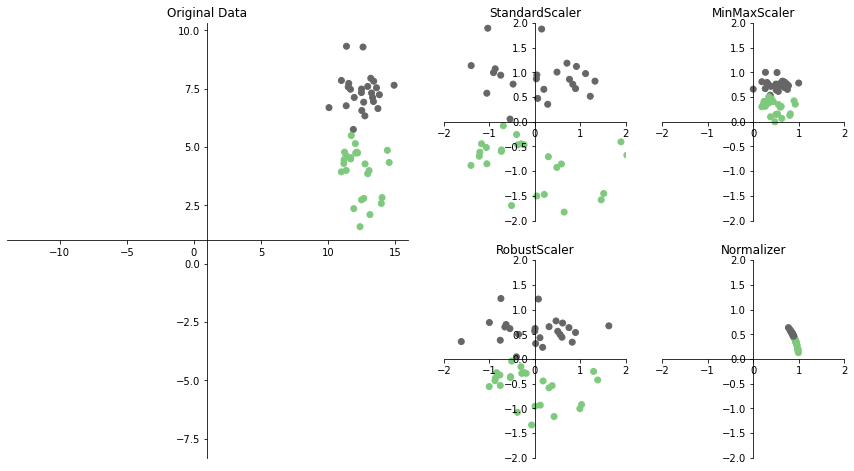%0A)


Finally, I will make use of the [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) function to combine the transformations for the categorical and numerical features. The Column Transformes apply each transformation to the relevant features (e.g., OneHotEncoding for Categorical and Scaling for numerical) and then combine the resultant representations as depicted in the picture below.

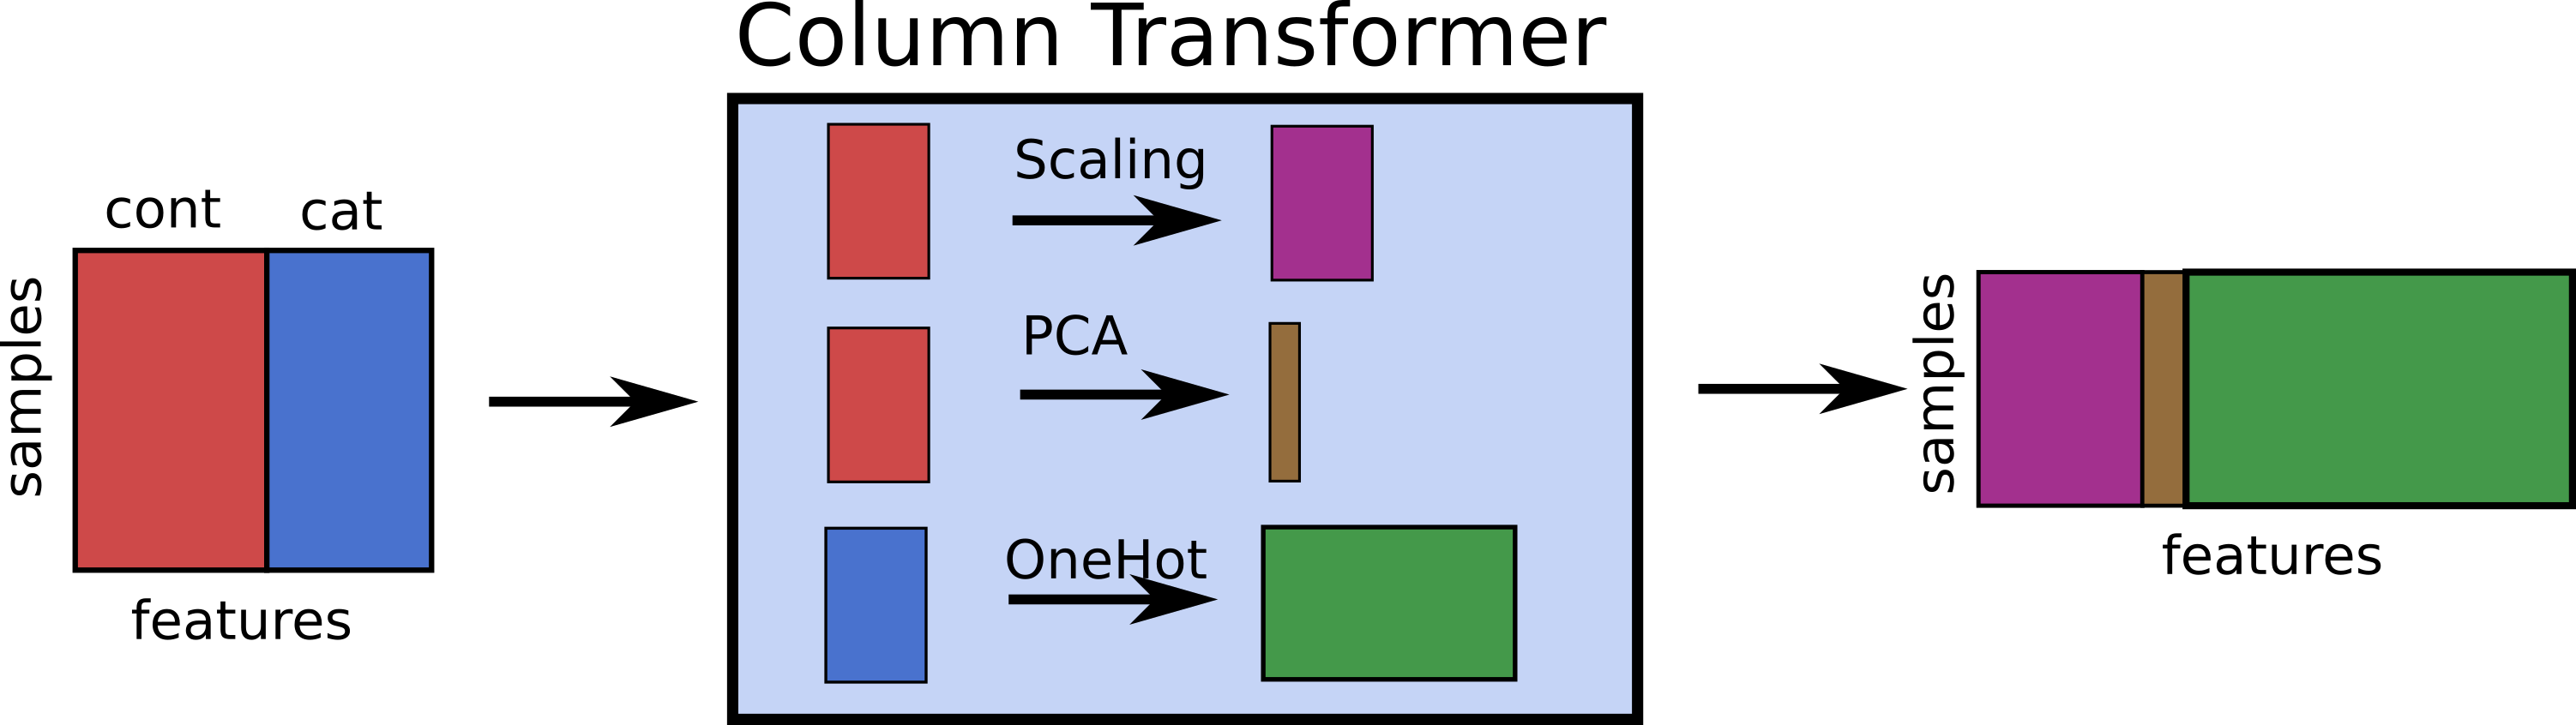)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Define what is a categorical feature (the type of the feature is equal to object)
categorical_cols = training.columns[training.dtypes!='float64'].tolist()
categorical_cols.remove('round_winner') # Remove the target variable
numerical_cols = training.columns[training.dtypes=='float64'].tolist()

numeric_transformer = Pipeline(
    steps=[("standard_scaler", StandardScaler()), ("min_max_scaler", MinMaxScaler())] # Standarize and scale to [0,1] values
)

# Create a column transformer to define different transformations for each column
preprocess = make_column_transformer(
    (numeric_transformer, numerical_cols), # StandardScaler and MinMaxScaler for non-categorical features
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols)) # OneHotEncoder for the categorical features (the handler_unknown param avoids future errors if a new category appears)

dummified_dataset = preprocess.fit_transform(training)
dummified_dataset = pd.DataFrame(dummified_dataset, columns=preprocess.transformers_[0][2] + preprocess.named_transformers_['onehotencoder'].get_feature_names().tolist())
dummified_dataset


,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,x0_de_cache,x0_de_dust2,x0_de_inferno,x0_de_mirage,x0_de_nuke,x0_de_overpass,x0_de_train,x0_de_vertigo,x1_False,x1_True
0,0.428179,0.40625,0.363636,1.000,0.748,0.922,0.780,0.176250,0.020000,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.199486,0.31250,0.242424,0.012,0.390,0.000,0.694,0.032500,0.158125,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.428122,0.18750,0.000000,1.000,0.928,0.996,0.974,0.274375,0.005000,0.8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.101057,0.37500,0.363636,0.364,0.428,0.200,0.748,0.016250,0.097500,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.542498,0.18750,0.212121,0.930,0.800,1.000,0.800,0.155625,0.181250,0.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.656759,0.31250,0.181818,1.000,1.000,1.000,0.800,0.010625,0.006250,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,0.999486,0.09375,0.151515,1.000,1.000,0.200,0.000,0.365000,0.557500,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9997,0.542384,0.21875,0.212121,0.944,1.000,1.000,0.998,0.078125,0.050625,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.199143,0.09375,0.151515,0.850,0.680,0.972,0.772,0.065625,0.010625,0.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Cool, it's now formatted as it should. Let's start working with it. In order to have a baseline to compare the improvements introduced by the feature engineering process I am going to train a model with the dataset as it is.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.5s finished


Accuracy: 0.74 (+/- 0.01)


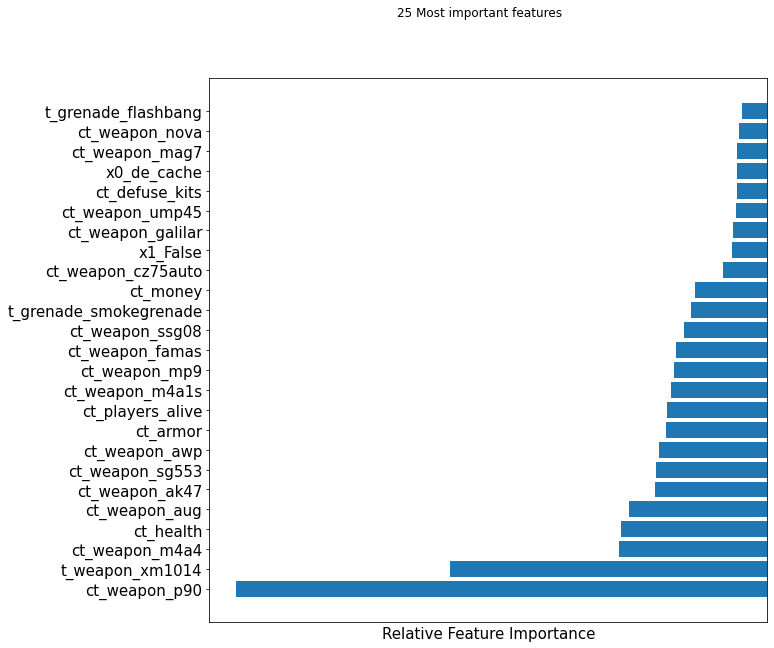

In [ ]:
baseline_results, score = train_model(
    dummified_dataset,
    training['round_winner'],
    linear_model.LogisticRegression(max_iter=1000, penalty='none')
)

In [ ]:
results_df = pd.DataFrame(columns=['Approach', 'Accuracy'])
results_df.loc[len(results_df)] = ['LR Baseline', score]
results_df

,Approach,Accuracy
0,LR Baseline,0.7442


Accuracy around 75%. Not a bad start. Let's see if we can improve it. To that end, we can study the  most important features in this baseline model. This will give us a first idea on the most important aspects in order to predict the `round_winner`.


## Cleaning outliers

We will now focus on numerical values. If NULL values are the natural enemy of categorical values, the main problem with numerical values are outliers (values which largely differ from the rest). 

An outlier is a data point whose value differs significantly from other observations. There could be several explanations for such extreme value. An outlier may be due to variability in the measurement, or it may indicate an error in the experiment or the measurement.

An outlier can cause serious problems in statistical analyses and in applying most machine learning models. Outliers can mislead the training of our models resulting in less accurate models and ultimately worse results.

Depending on the outlier source, you might decide to either remove them, impute them or keep them. For now, we will skip this section since we will discuss these aspects in more detail in the following practice. 

# Modeling

Now it's time to test other machine learning models to check if we can improve the baseline performance. Selecting your machine learning model is sometimes a matter of try and test. Nevertheless, there are some aspects related to the model operation that you must consider in order to pick the right model. 

We will cover these machine learning models in the upcoming sessions, focusing on their advantages and disadvantages in different scenarios.
We will stick to a simple Logistic Regression model for now.

My methodology in this section will be the following: I will start by training the algorithms with the default parameters to understand their level of performance. In this way, I will find the kind of algorithm that works better in general, without spending too much time in the configuration of the hyperparameters. Once I select the candidate/s with the best performance, I will then tune the related hyperparameters to find the optimal configuration (i.e., the one offering the best performance)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_results, score = train_model(
    chi2_dataset,
    training['round_winner'],
    KNeighborsClassifier())



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy: 0.72 (+/- 0.02)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished


As expected, pretty good result for this very simplistic approach. If you are looking for a quick win, KNN will give you a very good and fast result (i.e., just remind that it will time some time to compute each new prediction in test) and it will provide you an easily explainable solution (i.e., if we take a look at the features, it seems that it is paying attention to general features of the match, such as the health of bot teams, their score....).

Nevertheless, I expect that Decision Tree based methodologies could offer a better result. Let's check it

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


Accuracy: 0.76 (+/- 0.02)


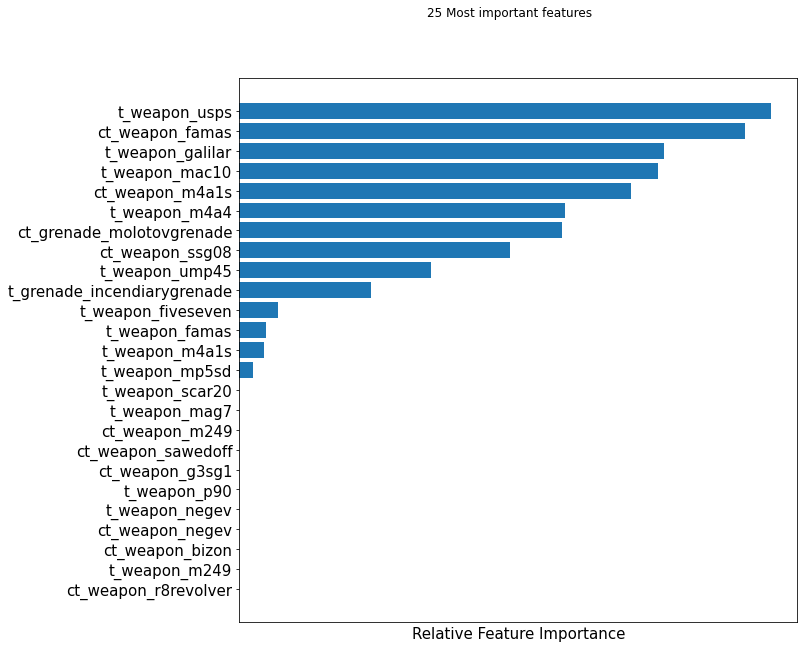

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_results, score = train_model(
    chi2_dataset,
    training['round_winner'],
    RandomForestClassifier())

Great! As expected RF is offering an astonishing result, improving the accuracy up to 0.77 (even with the default configuration). 
If we analyze

I think that RF is a great compromise between complexity (and computation times) and accuracy. Additionally, as explained in class, is robust to overfitting. Therefore, it seems that we have a strong candidate for the final submission.



Finally, let's check xgboost

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


Accuracy: 0.74 (+/- 0.01)


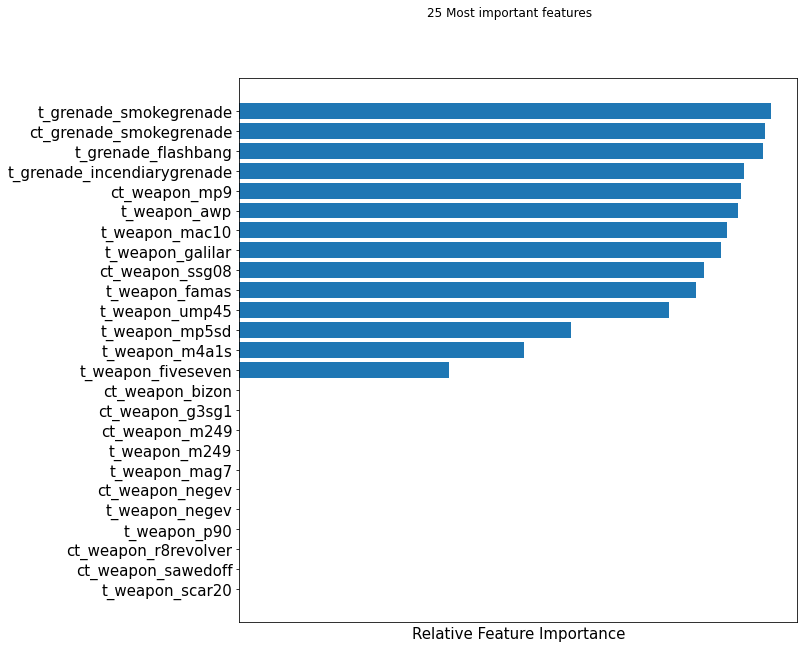

In [ ]:
import xgboost as xgb

xgb_results, score = train_model(
    chi2_dataset,
    training['round_winner'],
    xgb.XGBClassifier(objective='binary:logistic',random_state=3,
                      n_estimators=150,learning_rate=0.5,
                      subsample=0.8,colsample_bytree=0.8,max_depth=3,
                      gamma=0.1)
                    )

## Hyperparameter optimization

In the previous section we have implemented a basic LogReg model. LR has some hyperparameters related. I did not experiment with any of them (i.e., I have just used the default configuration). In this section, I would like to find the optimal configuration for these hyper-parameters.

To that end, I will make use of the hyper-parameter tuning methodologies that sklearn provides. In particular, I will make use of [`RandomizedSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Randomized Search is similar to [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), but instead of exhaustively trying all the possible combinations of hyper-parameters, which can be a lot, it starts by randomly selecting some combinations, evaluating them, to then continue trying other hyper-parameter combinations close to the ones performing well. The idea is to reduce the number of combinations you test by avoiding the execution of those that are clearly offering bad results. 

I have defined the following grid of hyper-parameters. Please, check the sklearn documentation regarding Logistic Regression to better understand the different hyper-parameters and their values (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Feel free to change it and test different combinations

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

optimized_rf = RandomizedSearchCV(RandomForestClassifier(),
                                  random_grid,
                                  verbose = True,
                                  n_iter=25) # Number of hyper-parameter configurations to test. You can increase it if you want to check more combinations of hyperparameters

optimized_rf.fit(chi2_dataset, training['round_winner'])
optimized_rf.best_estimator_ # The estimator (i.e., model) with the best hyper-parameter configuration

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomForestClassifier(bootstrap=False, max_depth=88, n_estimators=152)

Let's test the performance of the different hyper-parameter combinations

In [ ]:
param_cols = [c for c in optimized_rf.cv_results_ if c[:6] == 'param_']
pd.DataFrame(optimized_rf.cv_results_).sort_values(by="mean_test_score", ascending=False)[param_cols + ['mean_test_score', 'std_test_score']]

,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_bootstrap,mean_test_score,std_test_score
0,152,2,auto,88,False,0.7658,0.004697
11,105,5,auto,88,False,0.7648,0.006071
15,200,10,auto,76,False,0.7640,0.002490
1,200,5,auto,40,True,0.7636,0.005093
12,152,10,auto,52,False,0.7634,0.005886
23,200,5,auto,None,False,0.7633,0.003172
4,152,10,auto,100,False,0.7629,0.004862
7,105,10,auto,76,False,0.7629,0.006437
20,200,2,auto,88,False,0.7627,0.004032
18,105,2,auto,52,True,0.7622,0.006361


# Everything together: Pipelines

As additional material, I would like to review the idea of the sklearn pipelines. [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) is a sklearn object that allows the combination of transformers and estimators in order to create an end-to-end ML solution (i.e., including the data cleaning and transformation and the model training).

The following code shows a simplified version of it. I recommend you to check the official sklearn documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

training_set = pd.read_csv("./dataset/training_set.csv", delimiter=",", decimal=".")
test_set = pd.read_csv("./dataset/test_set.csv", delimiter=",", decimal=".")

# Define what is a categorical feature (the type of the feature is equal to object)
categorical_cols = training_set.columns[training_set.dtypes!='float64'].tolist()
categorical_cols.remove('round_winner') # Remove the target variable
numerical_cols = training_set.columns[training_set.dtypes=='float64'].tolist()

numeric_transformer = Pipeline(
    steps=[("standard_scaler", StandardScaler()), ("min_max_scaler", MinMaxScaler())] # Standarize and scale to [0,1] values
)

# Create a column transformer to define different transformations for each column
preprocess = make_column_transformer(
    (numeric_transformer, numerical_cols), # StandardScaler and MinMaxScaler for non-categorical features
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols)) # OneHotEncoder for the categorical features (the handler_unknown param avoids future errors if a new category appears)


steps = [('preprocessor', preprocess), ('pca', PCA()), ('rf', RandomForestClassifier())]

n_components = list(range(1,len(training_set.columns))) # Number of Principal Components

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)] # Number of trees in random forest
max_features = ['auto'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(40, 100, num = 6)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
bootstrap = [True, False] # Method of selecting samples for training each tree

random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__bootstrap': bootstrap,
               'pca__n_components':n_components}


pipeline = Pipeline(steps)

optimized_pipeline = RandomizedSearchCV(pipeline, random_grid, n_iter=25, n_jobs=-1)
optimized_pipeline.fit(training_set, training_set['round_winner'])

param_cols = [c for c in optimized_pipeline.cv_results_ if c[:6] == 'param_']
pd.DataFrame(optimized_pipeline.cv_results_).sort_values(by="mean_test_score", ascending=False)[param_cols + ['mean_test_score', 'std_test_score']]

,param_rf__n_estimators,param_rf__min_samples_split,param_rf__max_features,param_rf__max_depth,param_rf__bootstrap,param_pca__n_components,mean_test_score,std_test_score
9,200,2,auto,100,False,82,0.839820,0.004112
2,200,10,auto,52,False,64,0.833175,0.003237
18,57,2,auto,40,False,77,0.831492,0.003607
7,152,5,auto,52,False,50,0.831236,0.002369
23,152,10,auto,None,False,53,0.829493,0.002383
12,152,2,auto,88,True,59,0.826200,0.002851
21,152,2,auto,40,True,64,0.825908,0.001828
8,152,10,auto,40,True,89,0.823518,0.003600
0,105,2,auto,76,True,74,0.823286,0.003617
20,200,10,auto,88,True,55,0.819531,0.003238


In [ ]:
# Test prediction
final_pred = optimized_pipeline.predict(test_set)
predictions = pd.DataFrame({"pred": final_pred})
predictions

,pred
0,CT
1,CT
2,CT
3,T
4,T
...,...
40391,CT
40392,T
40393,CT
40394,T
